In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist


In [2]:
#Reading of .csv file
df = pd.read_csv("TheGuardianDataFinal.csv")
content = df['Text']
assert content.isnull().count() == len(content)

In [3]:
#Before stop word removal count
count = [len(content[i]) for i in range(len(content))]
# data['Count Before'] = count
print(count)

[8625, 9258, 2648, 13182, 1899, 7842, 11971, 8772, 5565, 9165, 3198, 2426, 8657, 9182, 12405, 11333, 25352, 7375, 12506, 12845, 3788, 23099, 7351, 7728, 4338, 10207, 11862, 10192, 10773, 5184, 13471, 1028, 6678, 3873, 4470, 10071, 7516, 2964, 3423, 6897, 7321, 6019, 2920, 1614, 1004, 3680, 8942, 6232, 8002, 16608, 7648, 7448, 8712, 8582, 7375, 4079, 8308, 2319, 1882, 7517, 5742, 6646, 638, 7839, 7870, 624, 20102, 10232, 5633, 4097, 3218, 7325, 6543, 3348, 7306, 4280, 9235, 9615, 3016, 1582, 1119, 4117, 6499, 4670, 3604, 10180, 3544, 5768, 9769, 6767, 3352, 828, 5165, 4172, 1195, 1460, 3413, 2723, 7797, 9302, 12164, 5348, 5273, 7782, 3729, 3376, 3347, 4418, 7799, 1798, 6489, 2310, 3982, 9678, 7603, 11839, 720, 5915, 3332, 7701, 5279, 9187, 13448, 5879, 5599, 8929, 2212, 1950, 26567, 3209, 21282, 5188, 4600, 8239, 1318, 4899, 4707, 4045, 7950, 6905, 5694, 4248, 6604, 13625, 5775, 6385, 6005, 7459, 9072, 16628, 8515, 7515, 2805, 11277, 4662, 3423, 9310, 6415, 9101, 7395, 10163, 3749, 6962

In [3]:
#Tokenization
from nltk.tokenize import RegexpTokenizer


data = []
tokenizer = RegexpTokenizer(r'\w+')

content = content.apply(lambda x: tokenizer.tokenize(x))
content.head(20)

0     [Brilliant, camera, slick, features, and, smal...
1     [On, a, dark, dark, night, in, a, dark, dark, ...
2     [Labour, has, written, to, the, competition, r...
3     [Google, s, latest, Pixel, 4, XL, smartphone, ...
4     [Apple, has, launched, a, new, set, of, its, p...
5     [I, use, a, 9, 7in, Samsung, Galaxy, Tab, S2, ...
6     [Always, on, screen, completes, the, package, ...
7     [Still, an, absolute, beast, in, every, way, e...
8     [First, it, was, books, then, it, was, the, Ki...
9     [The, OnePlus, 7T, takes, the, best, bits, of,...
10    [In, a, country, where, the, biggest, companie...
11    [I, think, you, should, at, least, make, an, e...
12    [Plastic, packaging, has, many, amazing, quali...
13    [A, great, camera, screen, and, performance, c...
14    [After, a, period, of, stagnation, the, A, Lea...
15    [Apple, s, iPhone, has, gone, pro, for, its, 1...
16    [Gordon, s, wine, bar, is, reached, through, a...
17    [Microsoft, has, launched, the, Surface, P

In [4]:
#Removal of Stop Words
from nltk.corpus import stopwords
set(stopwords.words('english'))

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

content = content.apply(lambda x: remove_stopwords(x))

In [6]:
#Lemmatization
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i, pos="a") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="s") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="v") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="r") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="n") for i in text]
    return lem_text

content = content.apply(lambda x: word_lemmatizer(x))
print(content[0])
content_freq = content

['Brilliant', 'camera', 'slick', 'feature', 'small', 'size', 'mean', 'nothing', 'phone', 'even', 'last', 'day', 'Google', 'one', 'handful', 'smartphone', 'manufacturer', 'still', 'making', 'flagship', 'phone', 'ginormous', 'beast', 'new', 'Pixel', '4', 'cheapest', 'significantly', 'undercut', 'competition', 'Priced', '669', 'Pixel', '4', '70', 'cheaper', 'last', 'year', 'Pixel', '3', '60', 'cheaper', 'Apple', 'iPhone', '11', 'It', 'also', 'cheaper', 'bigger', 'sibling', '829', 'Pixel', '4', 'XL', 'The', 'concern', 'corner', 'cut', 'matter', 'The', '5', '7in', 'FHD', 'OLED', 'display', '90Hz', 'refresh', 'rate', 'larger', '6', '3in', 'version', 'Pixel', '4', 'XL', 'It', 'look', 'similar', 'good', 'viewing', 'angle', 'inky', 'black', 'bold', 'colour', 'smooth', 'experience', 'thanks', 'high', 'refresh', 'rate', 'But', 'brightest', 'screen', 'available', 'make', 'fine', 'thing', 'quite', 'bright', 'I', 'would', 'like', 'direct', 'sunlight', 'There', 'large', 'forehead', 'containing', 'sen

In [19]:
joinedText = []
for articles in content:
    joinedText.append(" ".join(articles))
print(joinedText)


['Brilliant camera slick features small size mean nothing phone even last day Google one handful smartphone manufacturers still making flagship phones ginormous beasts new Pixel 4 cheapest significantly undercuts competition Priced 669 Pixel 4 70 cheaper last year Pixel 3 60 cheaper Apple iPhone 11 It also cheaper bigger sibling 829 Pixel 4 XL The concern corners cut matter The 5 7in FHD OLED display 90Hz refresh rate larger 6 3in version Pixel 4 XL It looks similar good viewing angles inky blacks bold colours smooth experience thanks high refresh rate But brightest screen available makes fine things quite bright I would like direct sunlight There large forehead containing sensors Google new Face Unlock Motion Sense systems The sides aluminium black textured coating glass back frosted texture similar super smooth skin Buy white orange version contrasting colours make Pixel 4 stand Combined slender proportions 68 8mm wide 162g Pixel 4 one smallest lightest easiest top end smartphones ho

In [18]:
df2 = pd.read_csv("TheGuardianDataFinal.csv")
content = df2['Text']
print(content[0])

Brilliant camera, slick features and small size mean nothing when the phone won’t even last a day

Google is one of only a handful of smartphone manufacturers still making flagship phones that aren’t ginormous beasts, with the new Pixel 4 the cheapest in a while that significantly undercuts the competition.

Priced at £669, the Pixel 4 is £70 cheaper than last year’s Pixel 3 and £60 cheaper than Apple’s iPhone 11. It’s also cheaper than its bigger sibling the £829 Pixel 4 XL. The concern is: which corners have been cut and do they matter?

The 5.7in FHD+ OLED display has the same 90Hz refresh rate as the larger 6.3in version on the Pixel 4 XL. It looks very similar too, with good viewing angles, inky blacks and bold colours and smooth experience thanks to that high refresh rate. But it’s not the brightest screen available, which makes it fine for most things but not quite as bright as I would like in direct sunlight.

There’s the same large forehead containing the sensors for Google’s 

In [20]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
sentiment = []
for articles in joinedText:
    sentiment.append(sia.polarity_scores(articles)["compound"])
    print("Sentiment Score:  ", sia.polarity_scores(articles)["compound"])

Sentiment Score:   0.9986
Sentiment Score:   0.999
Sentiment Score:   0.6908
Sentiment Score:   0.9997
Sentiment Score:   -0.8852
Sentiment Score:   0.9964
Sentiment Score:   0.9992
Sentiment Score:   0.9994
Sentiment Score:   0.9991
Sentiment Score:   0.9991
Sentiment Score:   0.985
Sentiment Score:   0.988
Sentiment Score:   0.9985
Sentiment Score:   0.9974
Sentiment Score:   0.9991
Sentiment Score:   0.9995
Sentiment Score:   -0.7853
Sentiment Score:   0.9926
Sentiment Score:   0.9995
Sentiment Score:   0.9951
Sentiment Score:   0.9942
Sentiment Score:   1.0
Sentiment Score:   -0.9768
Sentiment Score:   0.9995
Sentiment Score:   0.9595
Sentiment Score:   0.9989
Sentiment Score:   0.9997
Sentiment Score:   0.9982
Sentiment Score:   0.9993
Sentiment Score:   0.9938
Sentiment Score:   -0.9983
Sentiment Score:   0.9816
Sentiment Score:   0.9908
Sentiment Score:   -0.8846
Sentiment Score:   0.9961
Sentiment Score:   0.9994
Sentiment Score:   0.9984
Sentiment Score:   0.9929
Sentiment Sco

In [23]:
df["Senti"] = sentiment

In [25]:
daterange = df["Date"]

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

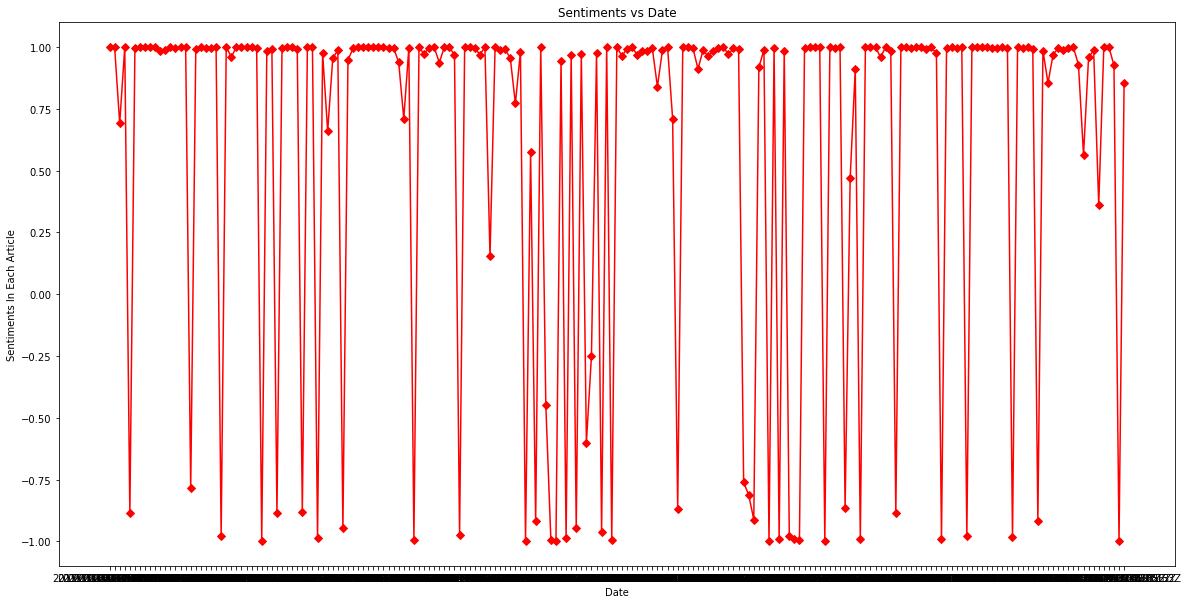

In [28]:
#Graph to show the relationship between the said date and the sentiments of the articles in the range 

plt.plot(daterange, sentiment, 'rD-')
# plt.ylim(-10,80)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.title("Sentiments vs Date")

plt.xlabel('Date')
plt.ylabel('Sentiments In Each Article')


plt.show()

In [24]:
df.to_csv("VaderSentiment.csv")

In [9]:
#Count after removal of stop words
countaft = [len(content[i]) for i in range(len(content))]
print(countaft)

[435, 944, 951, 241, 1399, 202, 834, 1237, 973, 558, 1007, 331, 255, 853, 1047, 1320, 1240, 2484, 802, 1348, 1366, 406, 2427, 710, 820, 468, 1057, 1288, 1063, 1156, 616, 1389, 112, 664, 383, 476, 1096, 754, 301, 317, 793, 766, 563, 320, 169, 96, 368, 861, 569, 876, 1827, 846, 809, 970, 879, 811, 393, 870, 253, 206, 801, 548, 709, 70, 835, 851, 67, 1956, 1132, 596, 424, 378, 824, 732, 367, 796, 455, 935, 995, 328, 171, 107, 432, 604, 441, 349, 1140, 345, 581, 1004, 723, 347, 78, 545, 449, 131, 148, 365, 298, 885, 919, 1288, 548, 556, 853, 407, 343, 345, 479, 792, 173, 686, 224, 394, 1034, 789, 1170, 82, 637, 341, 797, 579, 913, 1437, 580, 558, 892, 240, 205, 2776, 307, 1985, 545, 483, 807, 137, 494, 480, 426, 818, 731, 616, 428, 705, 1570, 591, 649, 628, 724, 904, 1585, 888, 806, 309, 1235, 550, 329, 1030, 705, 921, 799, 1094, 429, 762, 559, 260, 765, 329, 779, 1047, 343, 862, 960, 1240, 815, 230, 531, 779, 827, 664, 876, 3000, 937, 836, 199, 428, 641, 329, 486, 671, 458, 1089, 136, 220

In [10]:
#Tagging
content_tag = [nltk.pos_tag(i) for i in content]
print(content_tag)

[[('Google', 'NNP'), ('snapped', 'VBD'), ('Fitbit', 'NNP'), ('activity', 'NN'), ('tracker', 'NN'), ('business', 'NN'), ('2', 'CD'), ('1bn', 'CD'), ('1', 'CD'), ('6bn', 'CD'), ('deal', 'NN'), ('enable', 'JJ'), ('search', 'NN'), ('giant', 'NN'), ('go', 'VBP'), ('toe', 'JJ'), ('toe', 'NN'), ('Apple', 'NNP'), ('fast', 'RB'), ('growing', 'VBG'), ('smartwatch', 'RBR'), ('wearable', 'JJ'), ('business', 'NN'), ('Google', 'NNP'), ('paying', 'VBG'), ('cash', 'NN'), ('San', 'NNP'), ('Francisco', 'NNP'), ('based', 'VBN'), ('Fitbit', 'NNP'), ('set', 'JJ'), ('2007', 'CD'), ('It', 'PRP'), ('paying', 'VBG'), ('7', 'CD'), ('35', 'CD'), ('per', 'IN'), ('share', 'NN'), ('premium', 'NN'), ('70', 'CD'), ('Fitbit', 'NNP'), ('share', 'NN'), ('price', 'NN'), ('share', 'NN'), ('suspended', 'VBN'), ('earlier', 'RBR'), ('week', 'NN'), ('amid', 'IN'), ('takeover', 'NN'), ('speculation', 'NN'), ('The', 'DT'), ('price', 'NN'), ('however', 'RB'), ('fraction', 'NN'), ('company', 'NN'), ('value', 'NN'), ('floated', 'V

In [11]:
#Difference for the count before and after stop word removal
count_diff = []
for i in range(len(count)):
    count_diff.append(round(((count[i] - countaft[i])/count[i])*100, 1))
print(count_diff)

[89.6, 89.1, 89.7, 90.9, 89.4, 89.4, 89.4, 89.7, 88.9, 90.0, 89.0, 89.6, 89.5, 90.1, 88.6, 89.4, 89.1, 90.2, 89.1, 89.2, 89.4, 89.3, 89.5, 90.3, 89.4, 89.2, 89.6, 89.1, 89.6, 89.3, 88.1, 89.7, 89.1, 90.1, 90.1, 89.4, 89.1, 90.0, 89.8, 90.7, 88.5, 89.5, 90.6, 89.0, 89.5, 90.4, 90.0, 90.4, 90.9, 89.1, 89.0, 88.9, 89.1, 88.9, 89.8, 89.0, 90.4, 89.5, 89.1, 89.1, 89.3, 90.5, 89.3, 89.0, 89.3, 89.2, 89.3, 90.3, 88.9, 89.4, 89.7, 88.3, 88.8, 88.8, 89.0, 89.1, 89.4, 89.9, 89.7, 89.1, 89.2, 90.4, 89.5, 90.7, 90.6, 90.3, 88.8, 90.3, 89.9, 89.7, 89.3, 89.6, 90.6, 89.4, 89.2, 89.0, 89.9, 89.3, 89.1, 88.6, 90.1, 89.4, 89.8, 89.5, 89.0, 89.1, 89.8, 89.7, 89.2, 89.8, 90.4, 89.4, 90.3, 90.1, 89.3, 89.6, 90.1, 88.6, 89.2, 89.8, 89.7, 89.0, 90.1, 89.3, 90.1, 90.0, 90.0, 89.2, 89.5, 89.6, 90.4, 90.7, 89.5, 89.5, 90.2, 89.6, 89.9, 89.8, 89.5, 89.7, 89.4, 89.2, 89.9, 89.3, 88.5, 89.8, 89.8, 89.5, 90.3, 90.0, 90.5, 89.6, 89.3, 89.0, 89.0, 88.2, 90.4, 88.9, 89.0, 89.9, 89.2, 89.2, 88.6, 89.1, 90.7, 89.8, 89.

In [13]:
Freq = [FreqDist(content_freq[i]).most_common(5) for i in range(len(content_freq))]

In [17]:
# df['Content with Tag'] = content_tag
df['Amount Cleansed (%)'] = count_diff
# df['Frequency'] = Freq

df.to_csv('Output.csv')

In [ ]:
# Sentiment Analysis

In [ ]:
feeling_words = []
word_total_count = 0
for articles in content_tag:
    word_total_count += len(articles)
    for words in articles:
        if words[1].startswith('JJ'):
            feeling_words.append((words))

print(feeling_words)

In [ ]:
feeling_words_1 = []
word_total_count = 0
# for articles in content_tag:
#     word_total_count += len(articles)
#     for words in articles:
#         if words[1].startswith('JJ'):
#             feeling_words.append((words))
for words1 in content_tag[0]:
#     print(words1)
    if words1[1].startswith('JJ'):
        feeling_words_1.append((words1))

print(feeling_words_1)
print(len(feeling_words_1))

In [ ]:
# feeling_words = []
# word_total_count = 0
# for articles in content_tag:
#     word_total_count += len(articles)
#     for words in articles:
#         if words[1].startswith('JJ'):
#             feeling_words.append((words[0]))

# Feeling_Freq = FreqDist(feeling_words).most_common(500)
# # print(Feeling_Freq)
# adj_list = []
# for word in Feeling_Freq:
#     adj_list.append(word[0])
    
# print(adj_list)

# # word_features = list(Feeling_Freq.keys())[:500]
# # pprint(word_features)

In [ ]:
# adj_list_tag = [nltk.pos_tag(i) for i in adj_list]

# for word in adj_list:
#     nltk.pos_tag(word)

# # print(adj_list)

In [ ]:
# print(adj_list_tag)

In [ ]:
from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

for articles in feeling_words:
#     for words in articles:
    penn_to_wn(articles[1])


In [ ]:
from nltk.corpus import sentiwordnet as swn

breakdown = swn.senti_synset('breakdown.n.04')
print(breakdown)

In [ ]:
def get_sentiment(word,tag):
    """ returns list of pos neg and objective score. But returns empty list if not present in senti wordnet. """

    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    

    return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [ ]:
get_sentiment("toe", wn.NOUN)

In [ ]:
pos_list = []
neg_list = []

for articles in feeling_words:
    senti = get_sentiment(articles[0], articles[1])
    if len(senti) >0:
        if senti[0]>senti[1]:
            print("pos: " + articles[0] + str(senti))
            pos_list.append([articles[0], senti])
        elif senti[1]>senti[0]:
            print("neg: " + articles[0] + str(senti))
            neg_list.append([articles[0], senti])

In [ ]:
print(pos_list)

In [ ]:
print(neg_list)

In [ ]:
#Useless

# import pandas

# df_pos_list = pandas.DataFrame(pos_list)
# # print(df_pos_list)
# top_pos_list = FreqDist(df_pos_list[0]).most_common(200)
# print(top_pos_list)
# words_only = []
# for words in pos_list:
#     words_only.append(words[0])

# for asd in words_only:
#     print(FreqDist(asd).most_common(200))

In [ ]:
unique_pos = [] 

for eachlist in pos_list: 
    if eachlist not in unique_pos:
        unique_pos.append(eachlist) 

print(unique_pos)

In [ ]:
unique_neg = [] 

for eachlist in neg_list: 
    if eachlist not in unique_neg:
        unique_neg.append(eachlist) 

print(unique_neg)

In [ ]:
for posword in unique_pos:
    posvalue = posword[1][0]
    negvalue = posword[1][1]
    senti_value = str(posvalue - negvalue)
    posword.append(posword[1][0] - posword[1][1])
print(unique_pos)

In [ ]:
for negword in unique_neg:
    posvalue = posword[1][0]
    negvalue = posword[1][1]
    senti_value = str(posvalue - negvalue)
    negword.append(negword[1][0] - negword[1][1])
print(unique_neg)

In [ ]:
from pprint import pprint

sentiwordlist = unique_pos + unique_neg

pprint(sentiwordlist)

In [ ]:
#doesnt work:(

articlesenti = []

for article in content:
    totalsenti = []
    for word in article:
        for i in range(len(sentiwordlist)):
            if sentiwordlist[i][0] in word:
                totalsenti.append(sentiwordlist[i][2])
    articlesenti.append(sum(totalsenti))

In [ ]:
print(articlesenti)
print(len(articlesenti))

In [ ]:
articlesenti = []

for article in df['Text']:
    totalsenti = []
    print("\n***NEW ARTICLE***")
    for i in range(len(sentiwordlist)):
        if sentiwordlist[i][0] in article:
            print(sentiwordlist[i][0], sentiwordlist[i][2])
            totalsenti.append(sentiwordlist[i][2])
    articlesenti.append(sum(totalsenti))
    print("sum = {}, sentiwords = {}".format(sum(totalsenti), len(totalsenti)))

In [ ]:
print(len(feeling_words))
print(len(sentiwordlist))

In [ ]:
articlesenti = []

for article in df['Text']:
    totalsenti = []
    print("\n***NEW ARTICLE***")
    for i in range(len(sentiwordlist)):
        if sentiwordlist[i][0] in article:
            print(sentiwordlist[i][0], sentiwordlist[i][2])
            totalsenti.append(sentiwordlist[i][2])
    articlesenti.append(sum(totalsenti))
    print("sum = {}, sentiwords = {}".format(sum(totalsenti), len(totalsenti)))

In [ ]:
for i in range(len(articlesenti)):
    print(articlesenti[i], i)
print(len(articlesenti))

In [ ]:
articlepossenti = []

for article in df['Text']:
    totalpossenti = []
    for i in range(len(unique_pos)):
        if unique_pos[i][0] in article:
            totalpossenti.append(unique_pos[i][2])
    articlepossenti.append(sum(totalpossenti))
print(articlepossenti)

In [ ]:
articlenegsenti = []

for article in df['Text']:
    totalnegsenti = []
    for i in range(len(unique_neg)):
        if unique_neg[i][0] in article:
            totalnegsenti.append(unique_neg[i][2])
    articlenegsenti.append(sum(totalnegsenti))
print(articlenegsenti)

In [ ]:
articlenetsenti = [articlepossenti[i] + articlenegsenti[i] for i in range(len(articlepossenti))]
print(articlenetsenti)

In [ ]:
poscount = 0
negcount = 0
neucount = 0
for value in articlenetsenti:
    if value > 0:
        poscount += 1
    elif value < 0:
        negcount += 1
    elif value == 0:
        neucount += 1
        
print("Pos: {}, Neg: {}, Neu: {}".format(poscount, negcount, neucount))

In [ ]:
print(len(sentiwordlist))